
# Nikul Personal Project - Analysis of 7+ Million Company Dataset

#### In this project I will be using various Python libraries such as numpy, matplotlib, seaborn, plotly, pandas and bokeh in order to do an exploratory data analysis of the 7+ Million Company Dataset. This dataset was collected in 2019 by People Data labs. This dataset contains 7+ million companies from 237+ countries with information about each company such as their names, domains, size, year founded, industries, localities, countries and LinkedIn URLs.

In [37]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import pandas_bokeh
pd.set_option('plotting.backend', 'pandas_bokeh')

In [38]:
companies = pd.read_csv('/Users/nikulkerai/Desktop/Cambridge Spark Individual Project/companies_data.csv')
companies.head()

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960


In [39]:
companies.shape


(7173426, 11)

In [40]:
companies.info()
companies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   name                       object 
 2   domain                     object 
 3   year founded               float64
 4   industry                   object 
 5   size range                 object 
 6   locality                   object 
 7   country                    object 
 8   linkedin url               object 
 9   current employee estimate  int64  
 10  total employee estimate    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 602.0+ MB


,Unnamed: 0,year founded,current employee estimate,total employee estimate
count,7.173426e+06,3.566446e+06,7.173426e+06,7.173426e+06
mean,3.586712e+06,2.001747e+03,1.387121e+01,3.225438e+01
std,2.070790e+06,2.096627e+01,3.545919e+02,8.741556e+02
min,0.000000e+00,1.451000e+03,0.000000e+00,1.000000e+00
25%,1.793356e+06,1.999000e+03,1.000000e+00,1.000000e+00
50%,3.586712e+06,2.009000e+03,1.000000e+00,2.000000e+00
75%,5.380069e+06,2.013000e+03,4.000000e+00,7.000000e+00
max,7.173425e+06,2.103000e+03,2.740470e+05,7.169060e+05



# Data Cleaning Process

#### In this first stage of Dating cleaning I have rounded the description data to one decimal place in order to see the calculated numerical values clearly in the table below.

In [95]:
description = companies.describe()
rounded_description = description.round(1)
rounded_description

,Unnamed: 0,year founded,current employee estimate,total employee estimate
count,7173426.0,3566446.0,7173426.0,7173426.0
mean,3586712.5,2001.7,13.9,32.3
std,2070789.9,21.0,354.6,874.2
min,0.0,1451.0,0.0,1.0
25%,1793356.2,1999.0,1.0,1.0
50%,3586712.5,2009.0,1.0,2.0
75%,5380068.8,2013.0,4.0,7.0
max,7173425.0,2103.0,274047.0,716906.0


#### Below I then look at what columns are present in the data and then drop the columns that I do not deem necessary in my analysis of the dataset.

In [42]:
companies.columns

Index(['Unnamed: 0', 'name', 'domain', 'year founded', 'industry',
       'size range', 'locality', 'country', 'linkedin url',
       'current employee estimate', 'total employee estimate'],
      dtype='object')

In [43]:
new_companies =  companies.drop(['Unnamed: 0','domain','size range', 'linkedin url'], axis =1)

new_companies.head(5)

,name,year founded,industry,locality,country,current employee estimate,total employee estimate
0,ibm,1911.0,information technology and services,"new york, new york, united states",united states,274047,716906
1,tata consultancy services,1968.0,information technology and services,"bombay, maharashtra, india",india,190771,341369
2,accenture,1989.0,information technology and services,"dublin, dublin, ireland",ireland,190689,455768
3,us army,1800.0,military,"alexandria, virginia, united states",united states,162163,445958
4,ey,1989.0,accounting,"london, greater london, united kingdom",united kingdom,158363,428960


#### Once I have eliminated the unnecessary columns, I then proceed by calculating the percentage of null values for each category in the dataset. For year founded, locality, country and industry I successfully found some null values whereas for name, current_employee_estimate and total_employee_estimate there were not any null values present.

In [96]:
null_percentages = new_companies.isna().sum().sort_values(ascending=False) / len(new_companies) * 100
first_7_rows = null_percentages.iloc[:7]
first_7_rows

year_founded                 50.282529
locality                     34.973874
country                      32.748745
industry                      4.042741
name                          0.000042
current_employee_estimate     0.000000
total_employee_estimate       0.000000
dtype: float64

#### I then proceeded to plot a visual of the missing data as shown below in the bar chart where you can clearly see the percentages of the missing values.

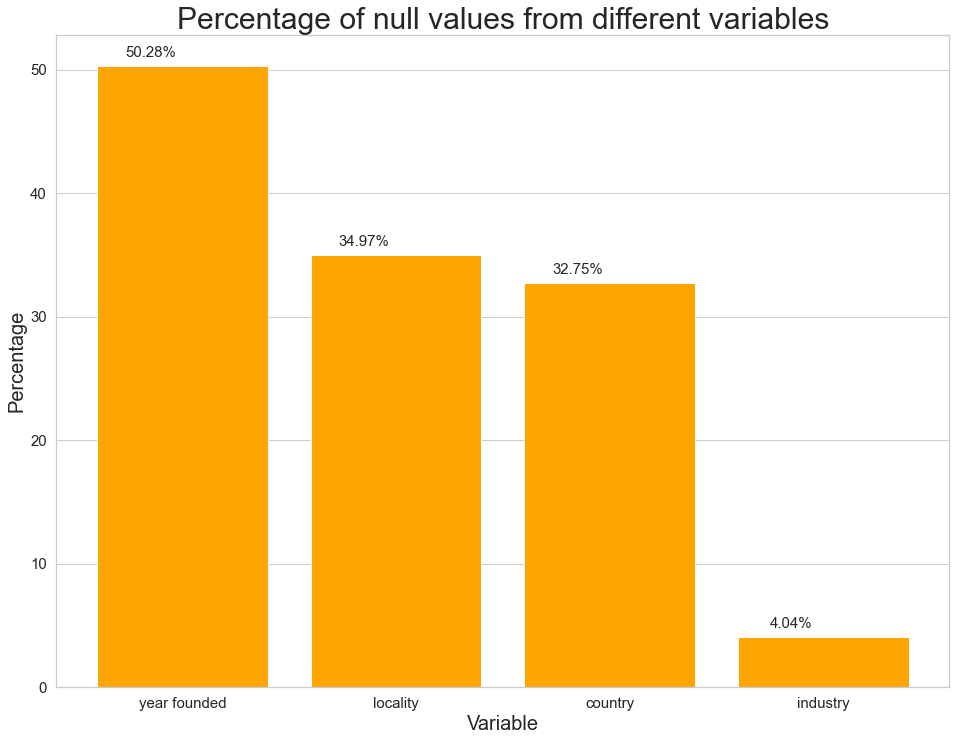

In [106]:

missing_data = pd.Series({
    'year founded': 50.282529,
    'locality': 34.973874,
    'country': 32.748745,
    'industry': 4.042741,
})

plt.figure(figsize=(16, 12))
bars = plt.bar(missing_data.index, missing_data.values, color='orange')

for bar, label in zip(bars, missing_data.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.5,
             f'{label:.2f}%', ha='center', va='bottom', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Variable', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.title('Percentage of null values from different variables', fontsize=30)
plt.grid(axis='x') 
plt.show()



# Exploratory Data Analysis Process

#### For the Exploratory Data Analysis section of this project I firstly decided to create a new csv with only 10000 rows of data taken from the original dataset to analyse. The reason I chose to do this was to avoid the duration of waiting for the whole dataset to load as this can be time consuming. Once I created the new csv, I plotted a normal distribution graph showing the distribution of the companies over the years between 1800 to 2006. 

In [46]:

new_companies = new_companies.rename(columns={"year founded": "year_founded","current employee estimate":"current_employee_estimate","total employee estimate":"total_employee_estimate"})

new_companies.country = new_companies.country.str.title()
new_companies.industry = new_companies.industry.str.title()

In [47]:

international_companies = new_companies.copy()

international_companies = new_companies.dropna()

international_companies.to_csv('companies_mod.csv')

international_companies_sample = pd.read_csv('companies_mod.csv',index_col = 0, nrows=10000)

In [48]:
import plotly.figure_factory as ff
x = international_companies_sample["year_founded"].dropna()

hist_data = [x]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels, curve_type='normal', bin_size=5)
fig.update_layout(template="plotly", title='Distribution of companies over the years', width=800, height=1000)
fig.update_xaxes(title_text='Year', title_font=dict(size=30), tickfont=dict(size=20))
fig.update_yaxes( tickfont=dict(size=20))
fig.show()


In [82]:

international_companies_sample = pd.read_csv('companies_mod.csv', index_col=0, nrows=10000)

df = international_companies_sample
filtered_data = df[(df['year_founded'] > 1800) & (df['year_founded'] < 1900)]

fig = px.scatter(filtered_data, x='industry', y='year_founded', color='country', 
                 title='Industries evolved over the years', 
                 labels={'industry': 'Industry', 'year_founded': 'Year from 1800 to 1900'},
                 hover_data={'country': True})

fig.update_layout(
    font=dict(size=15),
    xaxis_tickangle=-90,
    height=700 
)
fig.show()




#### Following on I then proceeded to plot scattergraphs of how the industries evolved from the periods of 1900 to 2006 and from 2000 to 2020 as shown in the below two plots.

In [83]:

international_companies_sample = pd.read_csv('companies_mod.csv', index_col=0, nrows=10000)

df = international_companies_sample
filtered_data = df[(df['year_founded'] > 1900) & (df['year_founded'] < 2006)]

fig = px.scatter(filtered_data, x='industry', y='year_founded', color='country', 
                 title='Industries evolved over the years', 
                 labels={'industry': 'Industry', 'year_founded': 'Year from 1900 to 2006'},
                 hover_data={'country': True})

fig.update_layout(
    font=dict(size=15),
    xaxis_tickangle=-90,
    height=700
)
fig.show()



In [84]:

international_companies_sample = pd.read_csv('companies_mod.csv', index_col=0, nrows=10000)

df = international_companies_sample
filtered_data = df[(df['year_founded'] > 2000) & (df['year_founded'] < 2020)]

fig = px.scatter(filtered_data, x='industry', y='year_founded', color='country', 
                 title='Industries evolved over the years', 
                 labels={'industry': 'Industry', 'year_founded': 'Year from 2000 to 2020'},
                 hover_data={'country': True})

fig.update_layout(
    font=dict(size=15),
    xaxis_tickangle=-90,
    height=700
)
fig.show()


#### The next steps I took was to plot two different line graphs where the first one looked at Current employee estimates in different countries and the second line graph looked at the total employee estimates in different countries around the world.

In [85]:

international_companies_sample = pd.read_csv('companies_mod.csv', index_col=0, nrows=10000)

df = international_companies_sample
filtered_data = df[(df['year_founded'] > 1800) & (df['year_founded'] < 2000)]

fig = px.line(filtered_data, x='country', y='current_employee_estimate', color='country', 
                 title='Current employee estimate in different countries', 
                 labels={'country': 'Country', 'year_founded': 'Year from 1800 to 2000'},
                 hover_data={'country': True})

fig.update_layout(
    font=dict(size=15),
    xaxis_tickangle=-90,
    height=700
)
fig.show()


In [86]:

international_companies_sample = pd.read_csv('companies_mod.csv', index_col=0, nrows=10000)

filtered_data = international_companies_sample[(international_companies_sample['year_founded'] > 1900) &
                                              (international_companies_sample['year_founded'] < 2000)]

fig = px.line(filtered_data, x='country', y='total_employee_estimate', color='country', 
              title='Total employee estimate in different countries', 
              labels={'country': 'Country', 'year_founded': 'Year'},
              hover_data={'country': True})
fig.update_layout(
    font=dict(size=15),
    xaxis_tickangle=-90,
    height=700
)
fig.show()


#### For the next set of visuals I calculated the total percentage of companies distributed in each country and plotted a horizontal bargraph displaying the data. I then proceeded to do the same for the various industries and calculated the percentage of companies distributed in each industry and plotted an identical horizontal bar graph to showcase this trend in the data.

In [54]:
print(international_companies_sample.columns)

Index(['name', 'year_founded', 'industry', 'locality', 'country',
       'current_employee_estimate', 'total_employee_estimate'],
      dtype='object')


/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



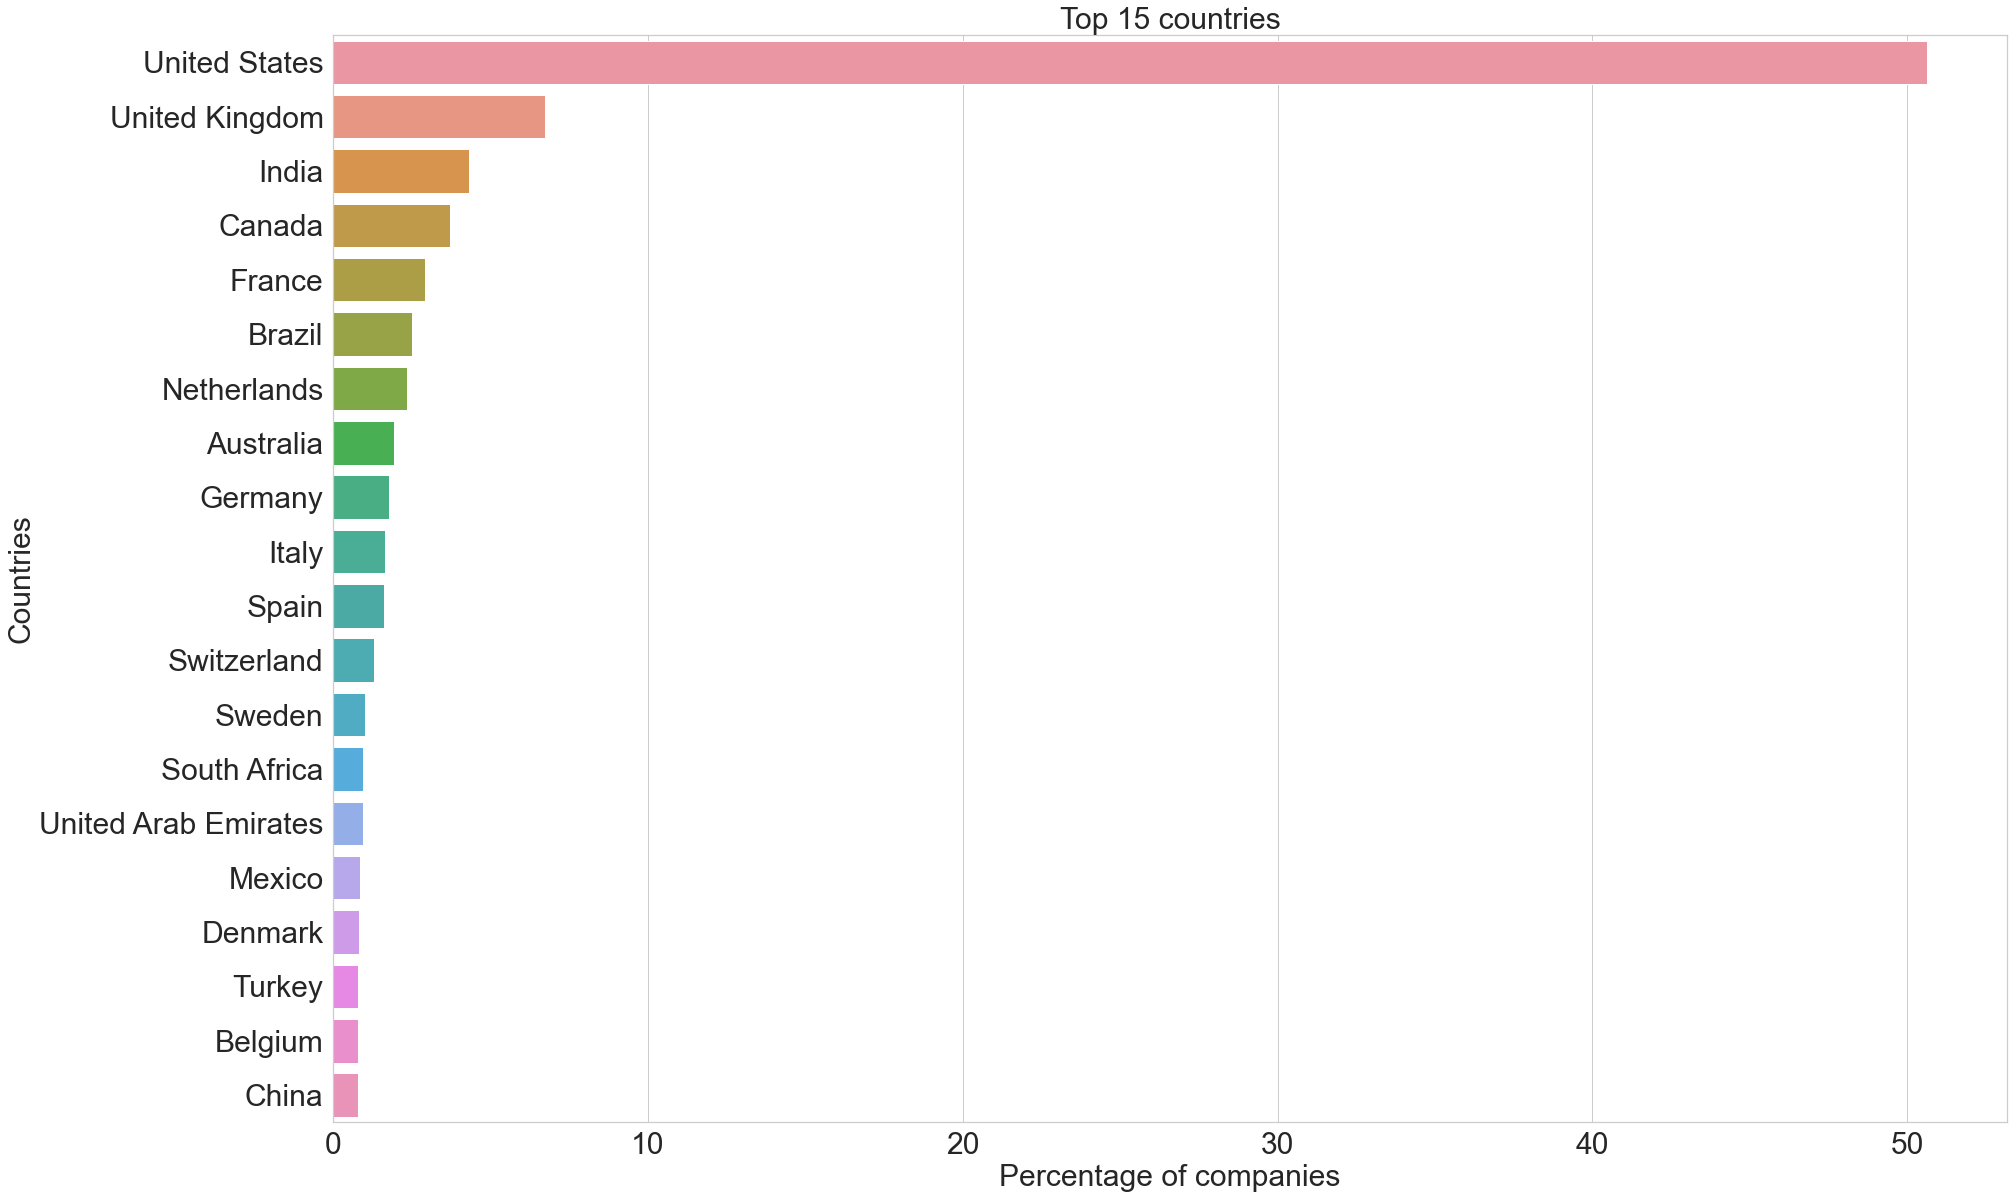

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

country_percentage = international_companies_sample['country'].value_counts() * 100 / len(international_companies_sample)
sns.set(style="whitegrid")

plt.figure(figsize=(30, 20))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)  
bar_plot = sns.barplot(country_percentage.values[:20], country_percentage.index[:20])
plt.xticks(fontsize=30)  
plt.title('Top 15 countries', fontsize=30)
plt.ylabel('Countries', fontsize=30)
plt.xlabel('Percentage of companies', fontsize=30)
plt.grid
plt.show()


/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



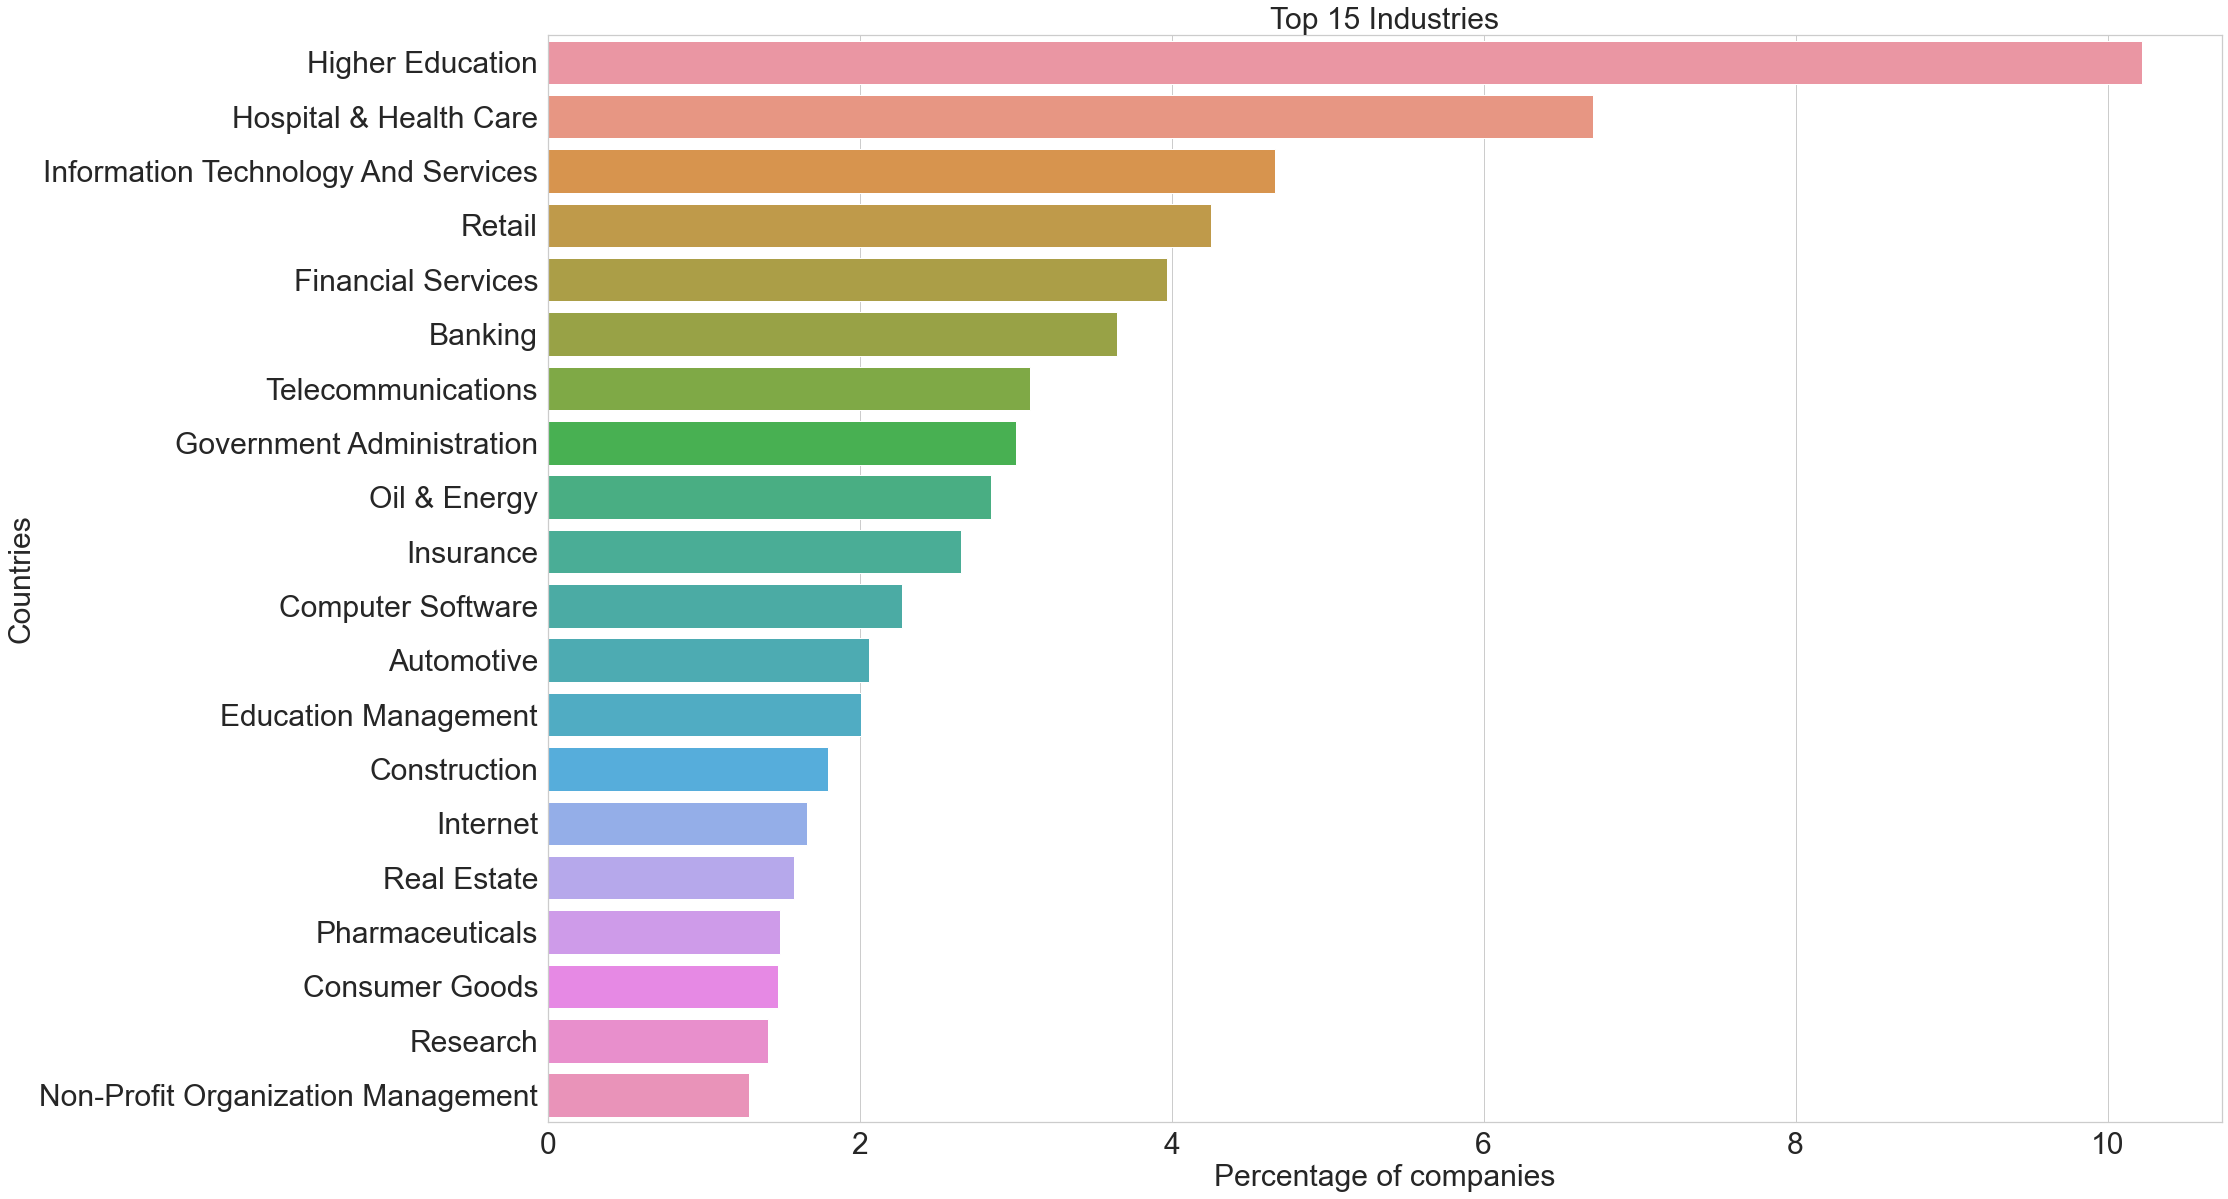

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

country_percentage = international_companies_sample['industry'].value_counts() * 100 / len(international_companies_sample)
sns.set(style="whitegrid")

plt.figure(figsize=(30, 20))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)  
bar_plot = sns.barplot(country_percentage.values[:20], country_percentage.index[:20])
plt.xticks(fontsize=30)  
plt.title('Top 15 Industries', fontsize=30)
plt.ylabel('Countries', fontsize=30)
plt.xlabel('Percentage of companies', fontsize=30)
plt.grid
plt.show()

#### For the next visualisation, I calculated the total percentage of the top 5 industries and plotted a pie chart to show how each industry is broken down globally. As you can see from this pie chart Higher Education industry takes up the largest portion of the companies globally distributed at 34.3%

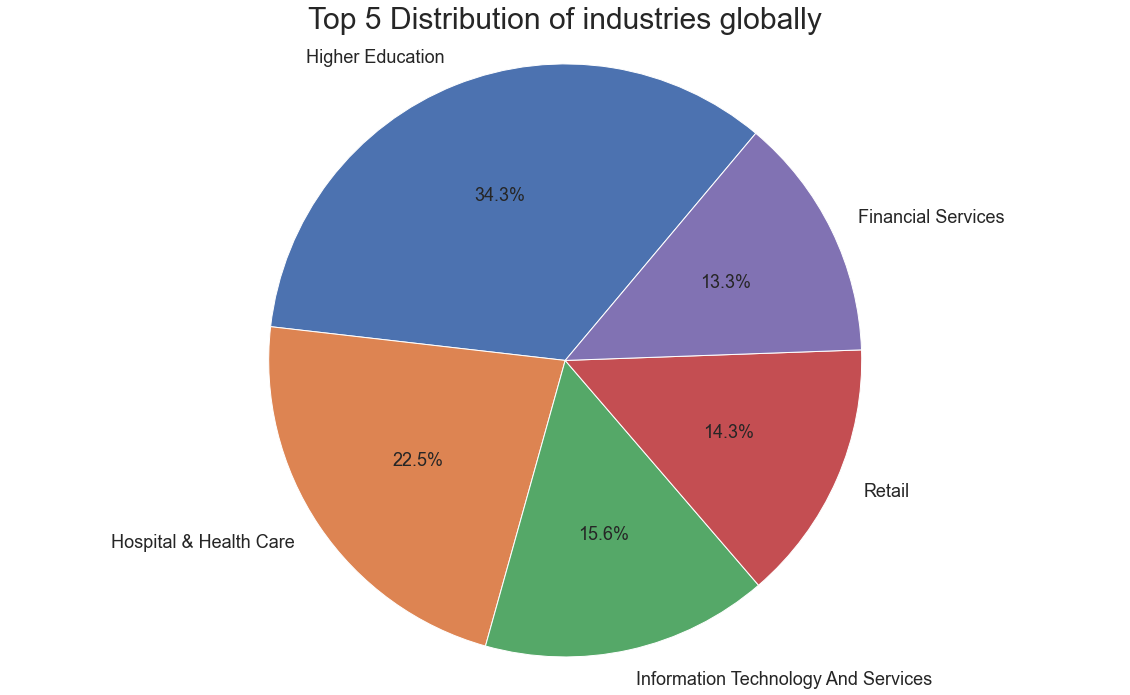

In [92]:
import matplotlib.pyplot as plt

country_percentage = international_companies_sample['industry'].value_counts() * 100 / len(international_companies_sample)
top_countries = country_percentage.head(5) 

plt.figure(figsize=(20, 12))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=50, textprops={'fontsize': 18})
plt.axis('equal')  
plt.title('Top 5 Distribution of industries globally', fontsize=30)
plt.show()


#### For the final visualisation, I calculated the total percentage for the Top 10 countries in the world that distribute a large proportion of the industries. From the below pie chart you can see that the United States accounts for a significant proportion of the companies distributed globally at 64.5%

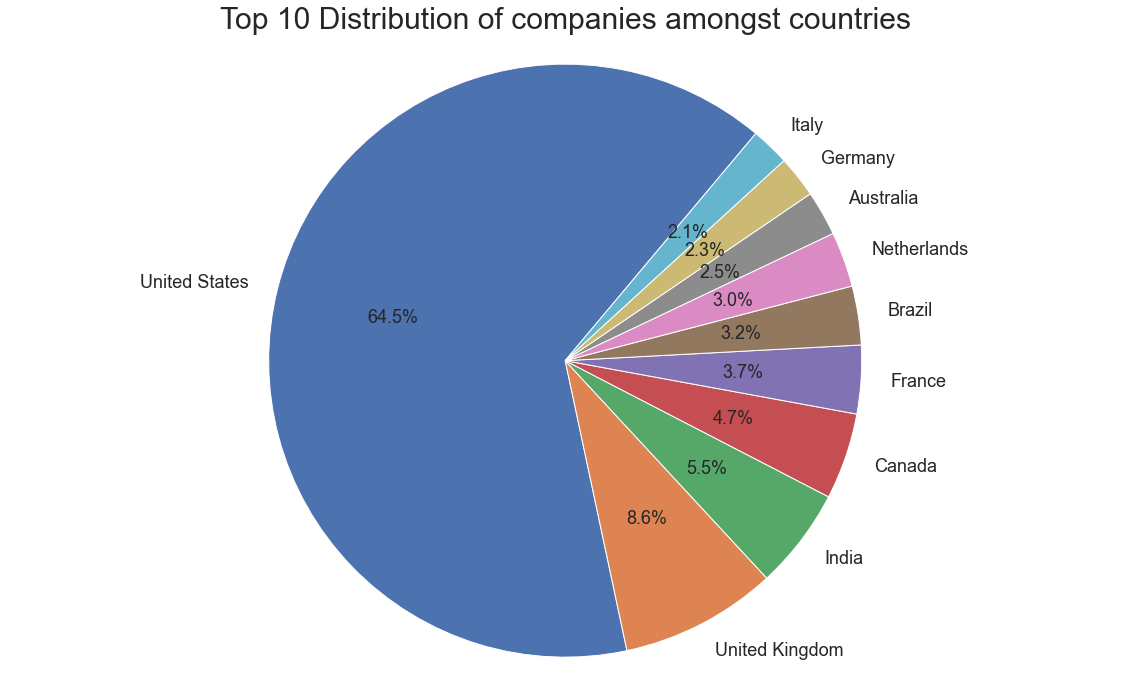

In [90]:
import matplotlib.pyplot as plt

country_percentage = international_companies_sample['country'].value_counts() * 100 / len(international_companies_sample)
top_countries = country_percentage.head(10) 

plt.figure(figsize=(20, 12))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=50, textprops={'fontsize': 18})
plt.axis('equal')  
plt.title('Top 10 Distribution of companies amongst countries', fontsize=30)
plt.show()

# Conclusions 


#### In this personal project of mine, the aim was to look at the 7 million+ Companies Dataset from Kaggle and perform some exploratory data analysis on it and try and understand what sort of trends the data was displaying and answer a few questions. The questions I looked to answer were as follows:

#### Q1) What is the distribution of the companies like over the years? 

#### The chart shows that the majority of the companies were founded between 1946 and 2006 around the world as the chart is displaying a left skewed distribution. As the histogram is skewed to the left it means that the mean is less than the median.

#### Q2) What is the distribution of the industries like over the years? 

#### Overall some industries took longer to become established in different countries whereas the higher education industry was one of the industries which developed rapidly over different countries.

#### Q3) What country has the highest total employee estimate? 

#### Ireland

#### Q4) What country has the highest current employee estimate? 

#### United States

#### Q5) What industry has the highest distribution globally as a percentage? 

#### Higher Education 34.3%

#### Q6) What country has the highest percentage of distributed industries? 

#### United States 64.5%

#### The steps I took to successfully achieve this project is to firstly load the necessary python libraries as shown above, preprocess the dataset so that I primarily focused on the columns of the data that I would be analysing and then dropped the columns that I would not be analysing. I also found out how much data was missing from different variables such as year_founded, country, industry and locality. I then created a modified csv with a small proportion of the dataset, choosing to analyse only 10000 rows of the data and then used this sample of the data to create horizontal and vertical bar charts, scatter plots, line graphs and pie charts to visualise the data in different ways. 

#### If I were to analyse this data further I would try to analyse the whole dataset to see if the same trends and insights are seen in the whole dataset in comparison to the 10000 rows I analysed from this dataset. I would also look to include the missing data such as Data from China by acquiring it or collecting a new and updated dataset for the current calender year. There is also the possibility of exploring industries by different cities across the world. Lastly I could look at stratified sampling for each country as this will further delve deep into the dataset and potentially bring up interesting insights and trends within this dataset. 

#### This concludes my EDA analysis project on the 7+ Million Companies Dataset.